In [1]:
#import necessary library functions
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

Load mnist data set

In [2]:
data = tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test) = data.load_data()

In [3]:
x_train.shape

(60000, 28, 28)

Platting first taining image

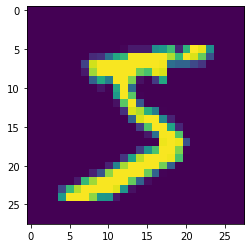

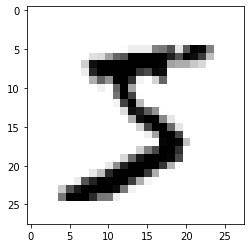

In [4]:
plt.imshow(x_train[0])
plt.show()
plt.imshow(x_train[0], cmap = plt.cm.binary)

Data normalization(divide by 255)

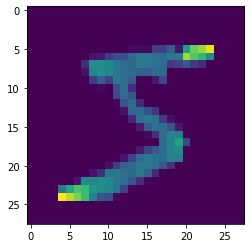

In [5]:
x_train = tf.keras.utils.normalize(x_train, axis =1)#it divide by 255 for all pixel value
x_test = tf.keras.utils.normalize(x_test, axis = 1)#it divide by 255 for all pixel value
plt.imshow(x_train[0])

Resize the image (for give input to CNN)

In [8]:
size = 28
x_trainr = np.array(x_train).reshape(-1,size,size,1)
x_testr = np.array(x_test).reshape(-1,size,size,1)
print("Traning sample dimension : ", x_trainr.shape)
print("Testing sample dimension : ", x_testr.shape)

Traning sample dimension :  (60000, 28, 28, 1)
Testing sample dimension :  (10000, 28, 28, 1)


Creating deeplearning architecture

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Conv2D,MaxPooling2D,Flatten,Activation
model = Sequential()
#Input covolution layer
model.add(Conv2D(64,(3,3), input_shape = (28,28,1), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

#Second covolution layer
model.add(Conv2D(64,(3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

#Third covolution layer
model.add(Conv2D(64,(3,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

#Fully connected layer
model.add(Flatten())
model.add(Dense(32, activation = 'relu'))

#Output layer
model.add(Dense(10, activation = 'softmax'))

In [15]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 1, 1, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 64)               

Model compile

In [17]:
model.compile(loss = 'sparse_categorical_crossentropy',
             optimizer = 'adam',
             metrics = ['accuracy'])

Train the model

In [20]:
model.fit(x_trainr,
         y_train,
         epochs = 5,
         validation_split = 0.3)

Epoch 1/5
1313/1313 [==============================] - 90s 63ms/step - loss: 0.6350 - accuracy: 0.7956 - val_loss: 0.1315 - val_accuracy: 0.9598
Epoch 2/5
1313/1313 [==============================] - 63s 47ms/step - loss: 0.1025 - accuracy: 0.9695 - val_loss: 0.0879 - val_accuracy: 0.9728
Epoch 3/5
1313/1313 [==============================] - 69s 53ms/step - loss: 0.0739 - accuracy: 0.9776 - val_loss: 0.0782 - val_accuracy: 0.9758
Epoch 4/5
1313/1313 [==============================] - 70s 53ms/step - loss: 0.0592 - accuracy: 0.9808 - val_loss: 0.0765 - val_accuracy: 0.9775
Epoch 5/5
1313/1313 [==============================] - 71s 54ms/step - loss: 0.0463 - accuracy: 0.9854 - val_loss: 0.0644 - val_accuracy: 0.9808


Evaluting model

In [22]:
import pandas as pd
losses = pd.DataFrame(model.history.history)
losses.head()

,loss,accuracy,val_loss,val_accuracy
0,0.304504,0.904833,0.131534,0.959833
1,0.099722,0.970309,0.087874,0.972778
2,0.071780,0.978167,0.078166,0.975833
3,0.058159,0.981738,0.076471,0.977500
4,0.046811,0.985048,0.064426,0.980833


<AxesSubplot:>

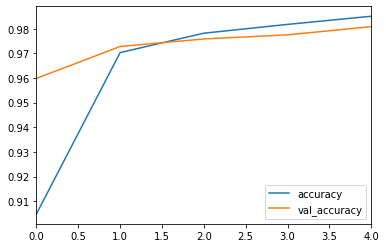

In [24]:
losses[['accuracy','val_accuracy']].plot()

<AxesSubplot:>

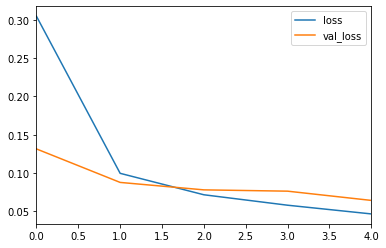

In [25]:
losses[['loss','val_loss']].plot()

In [26]:
from sklearn.metrics import classification_report
predictions = model.predict_classes(x_testr)
print(classification_report(y_test,predictions))

/home/deepu/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


              precision    recall  f1-score   support

           0       0.99      0.98      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.99      0.99      1032
           3       0.98      0.99      0.98      1010
           4       0.96      1.00      0.98       982
           5       0.98      0.98      0.98       892
           6       1.00      0.97      0.99       958
           7       0.98      0.98      0.98      1028
           8       1.00      0.95      0.98       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



Save model

In [27]:
from tensorflow.keras.models import load_model
model.save('cnn_model.h5')